In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [138]:
happiness_data = pd.read_csv(r"C:\Users\sanfe\Downloads\HappinessAlcoholConsumption.csv")

In [139]:
happiness_data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [140]:
happiness_data["Total_PerCapita"] = happiness_data["Beer_PerCapita"] + happiness_data["Spirit_PerCapita"] + happiness_data["Wine_PerCapita"]

In [141]:
happiness_data = happiness_data.set_index("Country")

In [142]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, Denmark to Syria
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            122 non-null    object 
 1   Hemisphere        122 non-null    object 
 2   HappinessScore    122 non-null    float64
 3   HDI               122 non-null    int64  
 4   GDP_PerCapita     122 non-null    float64
 5   Beer_PerCapita    122 non-null    int64  
 6   Spirit_PerCapita  122 non-null    int64  
 7   Wine_PerCapita    122 non-null    int64  
 8   Total_PerCapita   122 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 9.5+ KB


In [146]:
happiness_data.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Total_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361,300.762295
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503,205.128505
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000,5.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000,112.500000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000,298.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000,473.500000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000,665.000000


In [147]:
happiness_data["HappinessScore"].sort_values()[20], happiness_data["HappinessScore"].sort_values()[-20]
#I found the values to create the categories

(4.219, 6.778)

In [148]:
happiness_data.loc[happiness_data["HappinessScore"] < happiness_data["HappinessScore"].sort_values()[20],"HappinessCategory"] = "Low"
happiness_data.loc[happiness_data["HappinessScore"] > happiness_data["HappinessScore"].sort_values()[-20],"HappinessCategory"] = "High"

In [149]:
happiness_data["HappinessCategory"].fillna("Medium", inplace = True)

In [150]:
happiness_data["HappinessCategory"].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [151]:
happiness_data.columns

Index(['Region', 'Hemisphere', 'HappinessScore', 'HDI', 'GDP_PerCapita',
       'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita',
       'Total_PerCapita', 'HappinessCategory'],
      dtype='object')

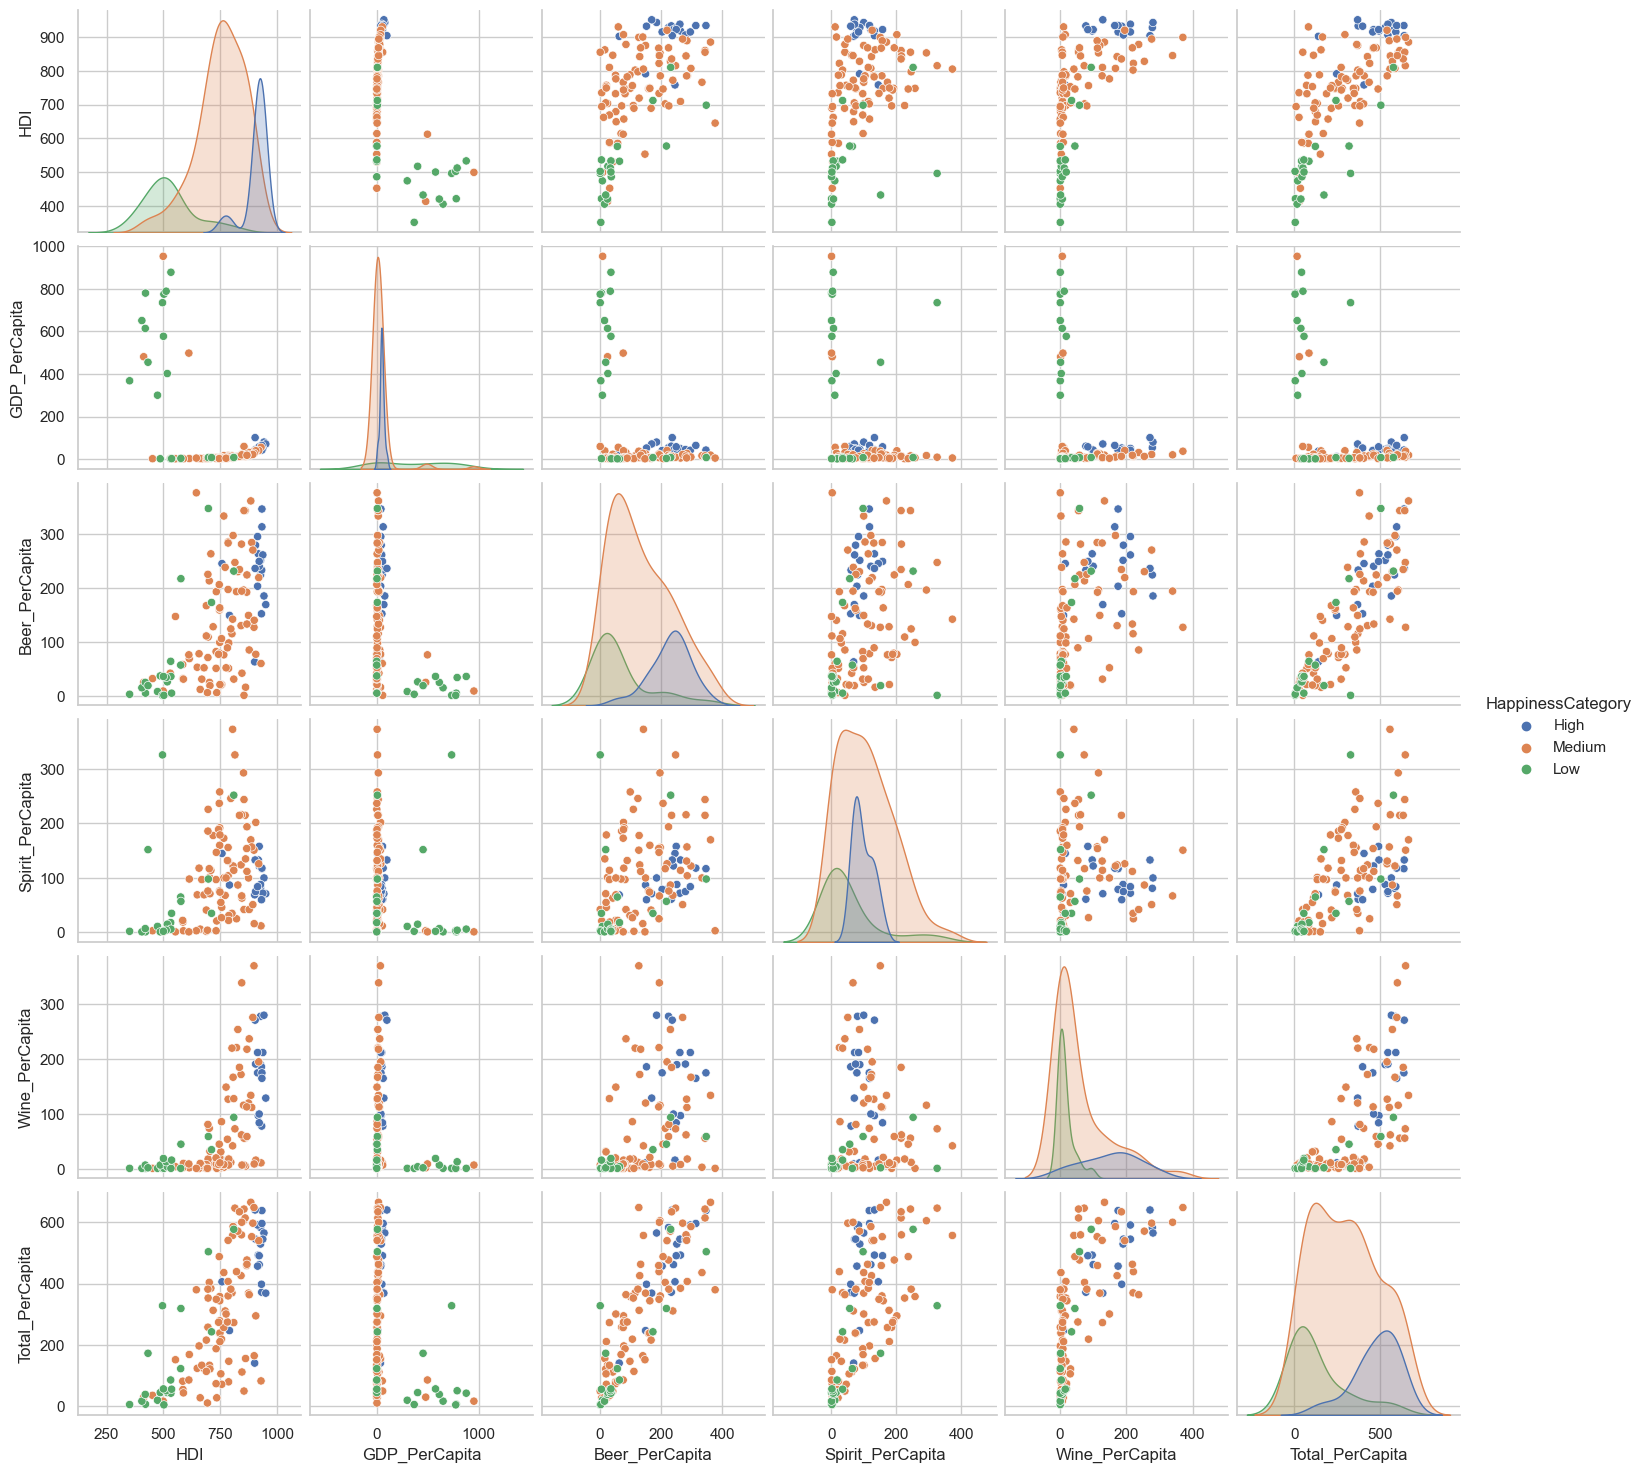

In [153]:
g = sb.pairplot(happiness_data.iloc[:,3:], hue = "HappinessCategory")
plt.show()

In [71]:
happiness_data.corr()

C:\Users\sanfe\AppData\Local\Temp\ipykernel_22924\121971746.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happiness_data.corr()


,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita,Total_PerCapita
HappinessScore,1.000000,0.815163,-0.451425,0.493367,0.256399,0.450589,0.547461
HDI,0.815163,1.000000,-0.573734,0.588394,0.393413,0.602561,0.715698
GDP_PerCapita,-0.451425,-0.573734,1.000000,-0.369936,-0.260818,-0.200154,-0.378559
Beer_PerCapita,0.493367,0.588394,-0.369936,1.000000,0.364855,0.474274,0.859574
Spirit_PerCapita,0.256399,0.393413,-0.260818,0.364855,1.000000,0.118718,0.634431
Wine_PerCapita,0.450589,0.602561,-0.200154,0.474274,0.118718,1.000000,0.719069
Total_PerCapita,0.547461,0.715698,-0.378559,0.859574,0.634431,0.719069,1.000000


C:\Users\sanfe\AppData\Local\Temp\ipykernel_22924\1342057045.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(happiness_data.corr(), cmap="YlGnBu", annot=True)


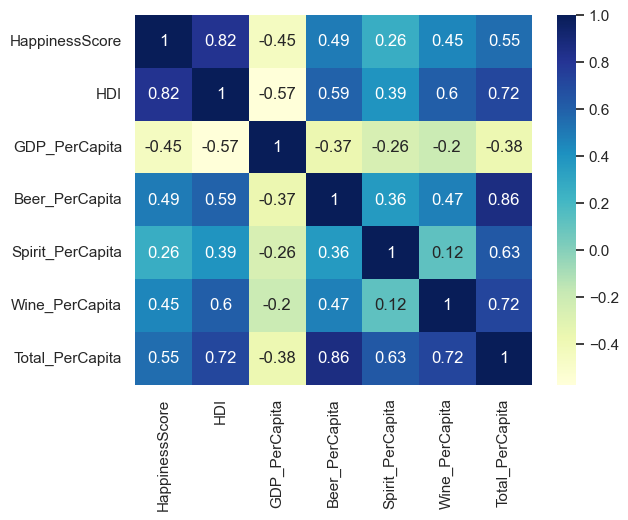

In [72]:
dataplot = sb.heatmap(happiness_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

We can see that there are some correlated variables: we have an high positive correlation between HDI and HappinessScore (with a value equal to 0.82). I will invesitigate the linear correlation between these two variables through Linear Regression.

In [73]:
means_regions = []
for i in happiness_data.Region.unique():
    means_regions.append(happiness_data.loc[happiness_data.Region == i, "HappinessScore"].mean())
means_regions

[6.731400000000001,
 7.254,
 7.323499999999999,
 5.443727272727274,
 6.061,
 5.492,
 5.383444444444446,
 5.477,
 4.151464285714285]

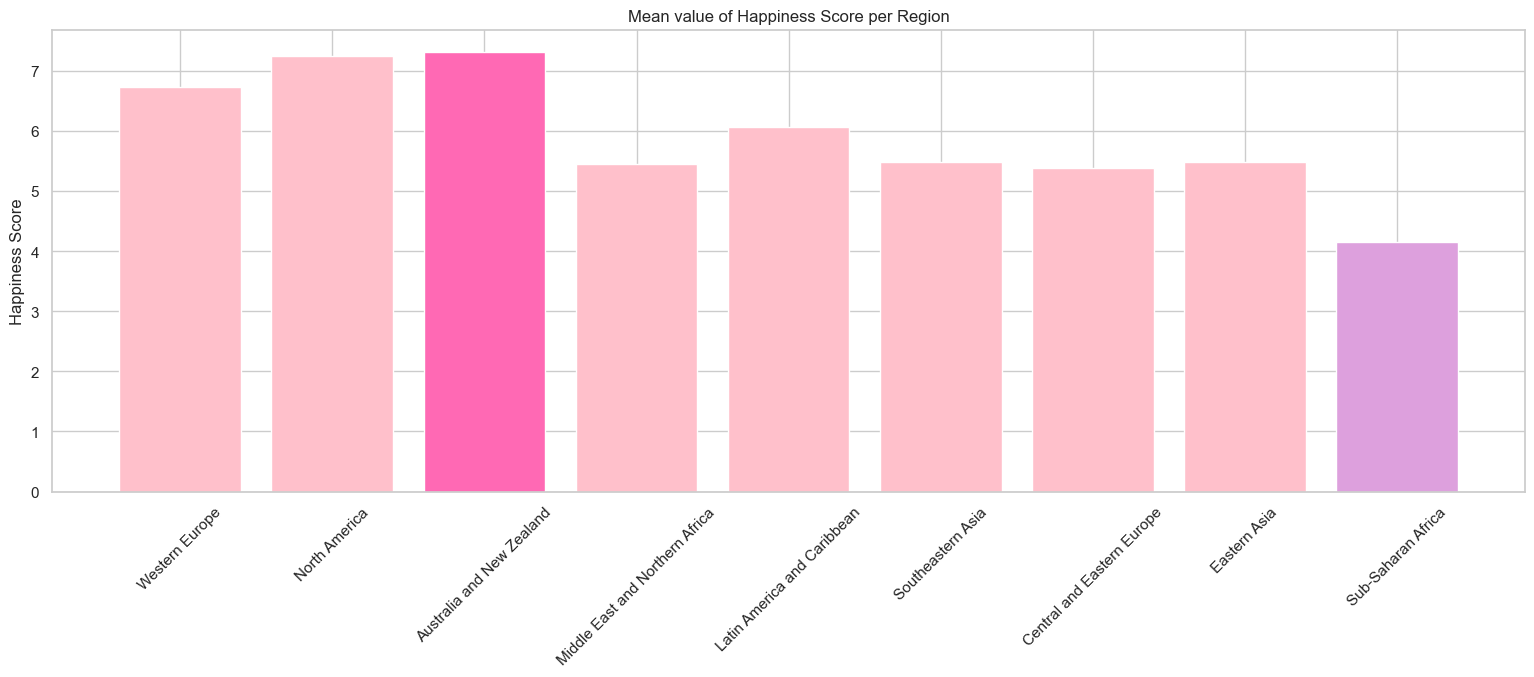

In [74]:
sb.set(style = "whitegrid")
plt.figure(figsize = (19,6))
plt.bar(happiness_data.Region.unique(), means_regions, color = ["pink", "pink", "hotpink", "pink", "pink", "pink", "pink", "pink", "plum"])
plt.title("Mean value of Happiness Score per Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 45)
plt.show()

In [75]:
higher_score = happiness_data.HappinessScore.sort_values(ascending = False)[0:10]
higher_score

Country
Denmark        7.526
Switzerland    7.509
Iceland        7.501
Norway         7.498
Finland        7.413
Canada         7.404
Netherlands    7.339
New Zealand    7.334
Australia      7.313
Sweden         7.291
Name: HappinessScore, dtype: float64

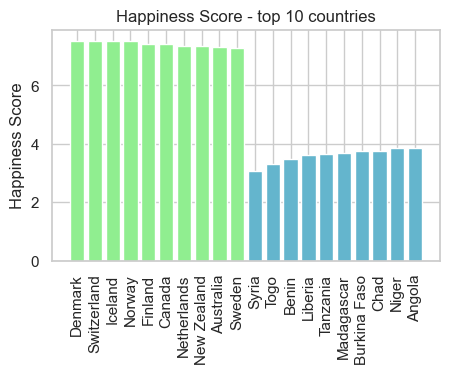

In [159]:
plt.figure(figsize = (5,3))
plt.bar(higher_score.index, higher_score, color = "lightgreen")
plt.bar(lower_score.index, lower_score, color = "c")
plt.title("Happiness Score - top 10 countries")
plt.ylabel("Happiness Score")
plt.xticks(rotation = "vertical")
plt.show()

This tells us that, although the countries with the highest values are in the north part of Europe, the region with highest mean Happiness score is Australia and New Zealand (with a value around 7.3). This is due to the fact that both Australia and New Zealand are in the top 10 (in position 9 and 8, respectively). On the contrary, Western Europe in composed of many other countries, which probably don't have such a good happiness score, giving a bad contribution to the mean value.  

Country
Cambodia        3.907
Angola          3.866
Niger           3.856
Chad            3.763
Burkina Faso    3.739
Madagascar      3.695
Tanzania        3.666
Liberia         3.622
Benin           3.484
Togo            3.303
Name: HappinessScore, dtype: float64

The countries with the 10 lowest happiness scores are part of Africa, thus confirming what I have just found before: the region with the lowest mean value of Happiness score is Sub-Saharan Africa (with a value slightly above 4), and even Southeastern Africa has a very low value (around 5.5).

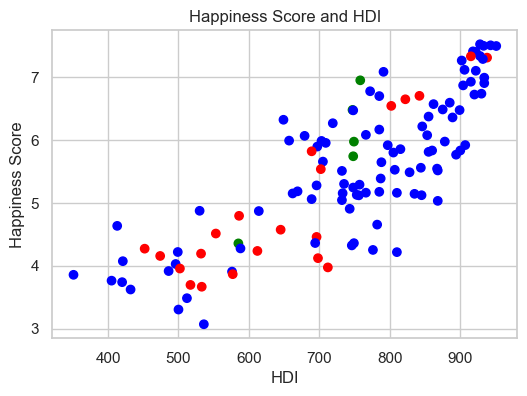

In [130]:
hemisphere_colors = {'north': 'blue', 'south': 'red', "both": "green"}
""

plt.figure(figsize = (6,4))
plt.scatter(happiness_data.HDI, happiness_data.HappinessScore, color = happiness_data['Hemisphere'].map(hemisphere_colors))
plt.title("Happiness Score and HDI")
plt.ylabel("Happiness Score")
plt.xlabel("HDI")
plt.xticks(rotation = "horizontal")
plt.show()

In [103]:
x_train, x_test, y_train, y_test = train_test_split(happiness_data.iloc[:, [3, 4, 5, 6, 7]].values, happiness_data.loc[:,"HappinessCategory"].values, test_size = 0.25)
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

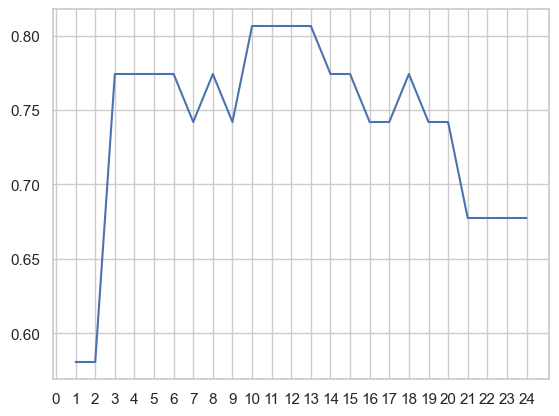

In [104]:
k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xticks(range(0,25))
plt.show()

In [110]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [111]:
metrics.accuracy_score(y_test, y_pred)

0.8064516129032258

In [112]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 3,  0,  2],
       [ 0,  4,  4],
       [ 0,  0, 18]], dtype=int64)

In [113]:
y_pred

array(['Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Medium'], dtype=object)

In [114]:
y_test

array(['Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Low', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'Low'], dtype=object)